# Distribuciones de probabilidad
Describe como está distribuida una variable aleatoria. Nos dice qué valores de una variable aleatoria son más probables así como cuales lo son menos.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# Distribución Uniforme

In [8]:
uniform_data = stats.uniform.rvs(size=1000000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10
uniform_data      

                                

array([1.95808283, 9.3042463 , 0.85102477, ..., 5.83348113, 3.21199018,
       2.06785848])

<AxesSubplot: ylabel='Density'>

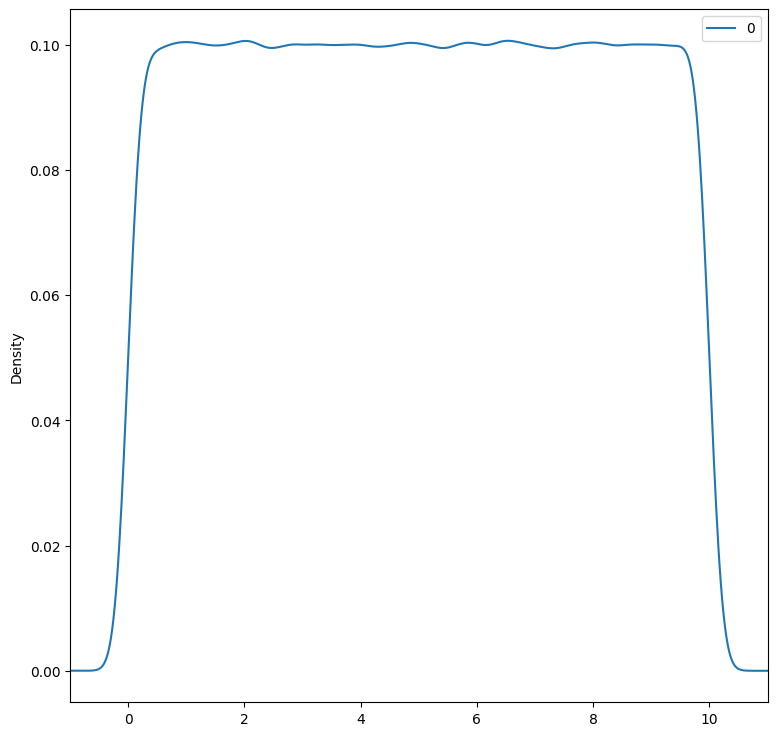

In [10]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

stats.distribution.rvs() genera muestras aleatorias de una distribución concreta. Depende la distribución que estemos trabajando le tendremos que dar unos inputs o otros.

tats.distribution.cdf se usa para determinar la probabilidad de que dicha distribución tome en el valor que le indicamos o uno menos (función de distribución)



In [11]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

stats.distribution.ppf() es la inversa de cdf. Te devuelve el valor de la variable (cuantil) asociado a la probabilidad acumulada que le indiques.

In [12]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

stats.distribution.pdf() nos indica la función de densidad (la altura dela función de distribución) dado un valor de x.

In [13]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


La distribución normal o gaussiana es una distribución de probabilidad continua caracterizada por una curva simétrica en forma de campana. Una distribución normal se define por su centro (media) y dispersión (desviación estándar). La mayor parte de las observaciones generadas a partir de una distribución normal se encuentran cerca de la media, que se encuentra en el centro exacto de la distribución: como regla general, alrededor del 68 % de los datos se encuentran dentro de 1 desviación estándar de la media, el 95 % se encuentra dentro de 2 desviaciones estándar y el 99,7% se encuentran dentro de 3 desviaciones estándar.

La distribución normal es quizás la distribución más importante de todas las estadísticas. Resulta que muchos fenómenos del mundo real, como los puntajes de las pruebas de coeficiente intelectual y las alturas humanas, siguen aproximadamente una distribución normal, por lo que a menudo se usa para modelar variables aleatorias. Muchas pruebas estadísticas comunes asumen que las distribuciones son normales.

El apodo de scipy para la distribución normal es norm. Investiguemos la distribución normal:

In [15]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


El resultado muestra que aproximadamente el 16 % de los datos generados por una distribución normal con media 0 y desviación estándar 1 está por debajo de -1, el 16 % está por encima de 1 y el 68 % se encuentra entre -1 y 1, lo que concuerda con 68, 95, regla 99.7.

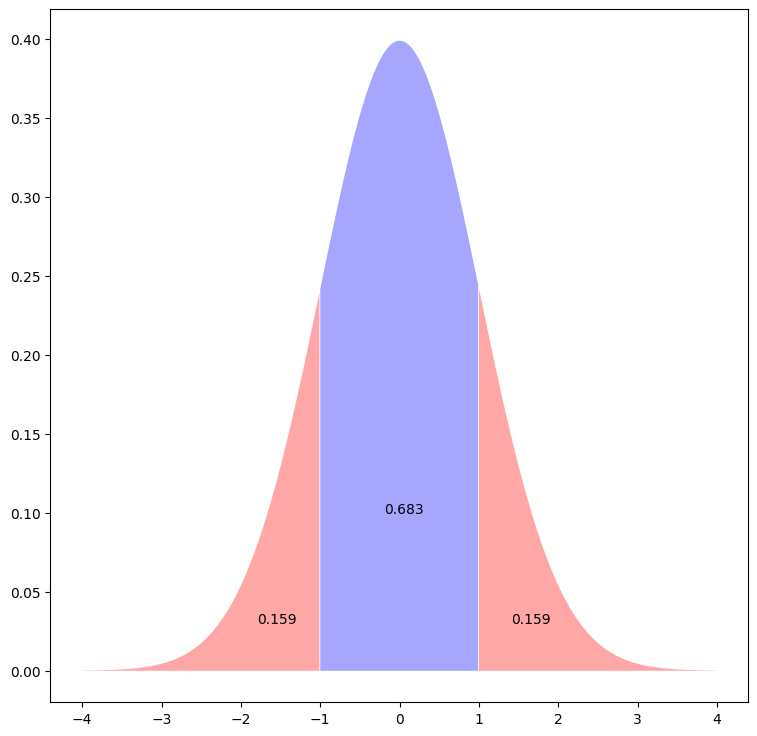

In [16]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

Encontrar cuantiles de la distribución normal es una tarea común cuando se realizan pruebas estadísticas. Puede comprobar los cuantiles de distribución normal con stats.norm.ppf():

In [17]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


El resultado del cuantil anterior confirma que aproximadamente el 5 % de los datos se encuentran a más de 2 desviaciones estándar de la media.

# Distribución Binomial

La [distribución binomial](https://en.wikipedia.org/wiki/Binomial_distribution) es una distribución de probabilidad discreta que modela los resultados de un número dado de senderos aleatorios de algún experimento o evento. El binomio se define por dos parámetros: la probabilidad de éxito en cualquier intento y el número de intentos. La distribución binomial te dice qué tan probable es lograr un número dado de éxitos en n intentos del experimento. Por ejemplo, podríamos modelar el lanzamiento de una moneda al aire 10 veces con una distribución binomial donde el número de intentos se establece en 10 y la probabilidad de éxito se establece en 0,5. En este caso, la distribución nos diría qué tan probable es obtener cero caras, 1 cara, 2 caras y así sucesivamente.

El nombre de Scipy para el binomio es binomial. Generemos e investiguemos algunos datos binomiales:

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts  10  104  422  1146  1990  2517  2095  1186  435  90   5


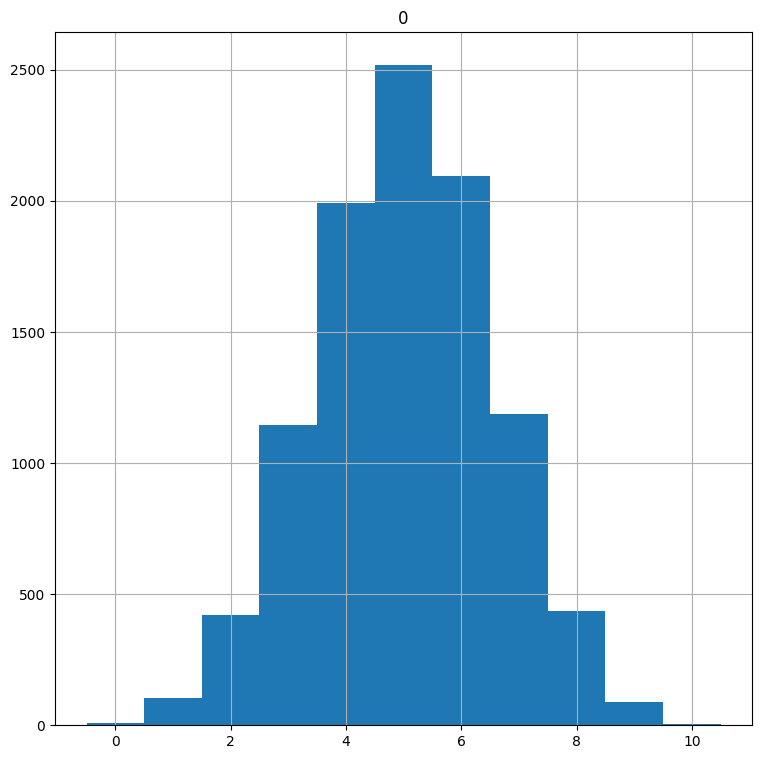

In [18]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

Hay que tener en cuena en cuenta que dado que la distribución binomial es discreta, solo toma valores enteros, por lo que podemos resumir los datos binomiales con una tabla de frecuencia y su distribución con un histograma. El histograma nos muestra que una distribución binomial con un 50 % de probabilidad de éxito es aproximadamente simétrica, con los resultados más probables en el centro. Esto recuerda a la distribución normal, pero si alteramos la probabilidad de éxito, la distribución no será simétrica:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   5  65  262  841  1982  3049  2731  1065


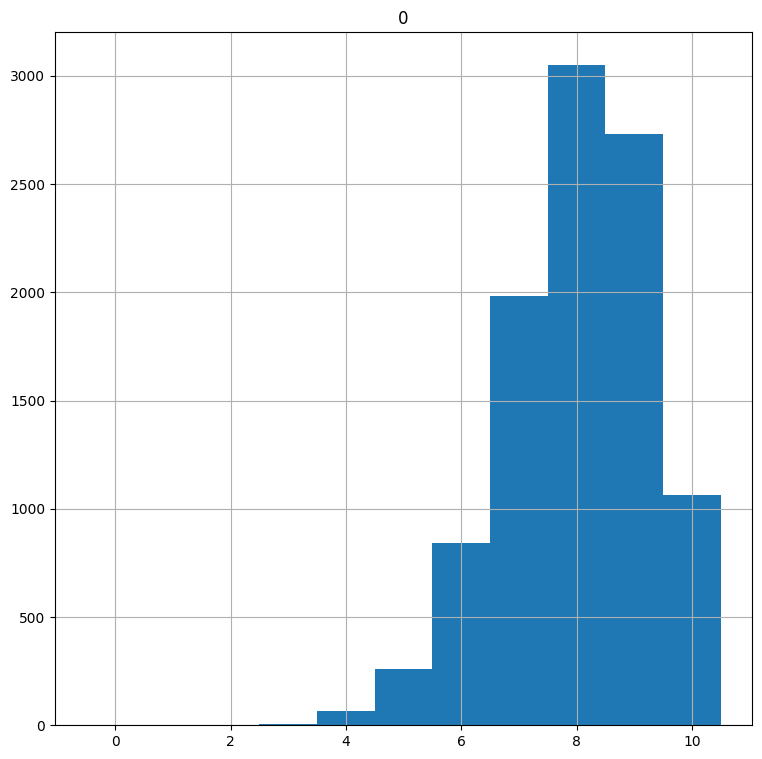

In [24]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

La función cdf() nos permite verificar la probabilidad de lograr una cantidad de éxitos dentro de un cierto rango:

In [25]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [26]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

Para funciones de densidad de probabilidad continuas, se utiliza pmf() para verificar la densidad de probabilidad en un valor x dado. Para distribuciones discretas como la binomial, se usa stats.distribution.pmf() (función de masa de probabilidad) para verificar la masa (proporción de observaciones) en un número dado de éxitos k:

In [27]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000003

In [28]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999993

# Distribución de Poisson

La distribución de Poisson modela la probabilidad de ver una cierta cantidad de éxitos dentro de un intervalo de tiempo, donde el tiempo que lleva el siguiente éxito se modela mediante una distribución exponencial. La distribución de Poisson se puede usar para modelar el tráfico, como la cantidad de llegadas que un hospital puede esperar en una hora o la cantidad de correos electrónicos que esperaría recibir en una semana.

El nombre de Scipy para la distribución de Poisson es "poisson". Generemos y representemos algunos datos de una distribución de Poisson con una tasa de llegada de 1 por unidad de tiempo:

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3732  3655  1803  628  142  35  5


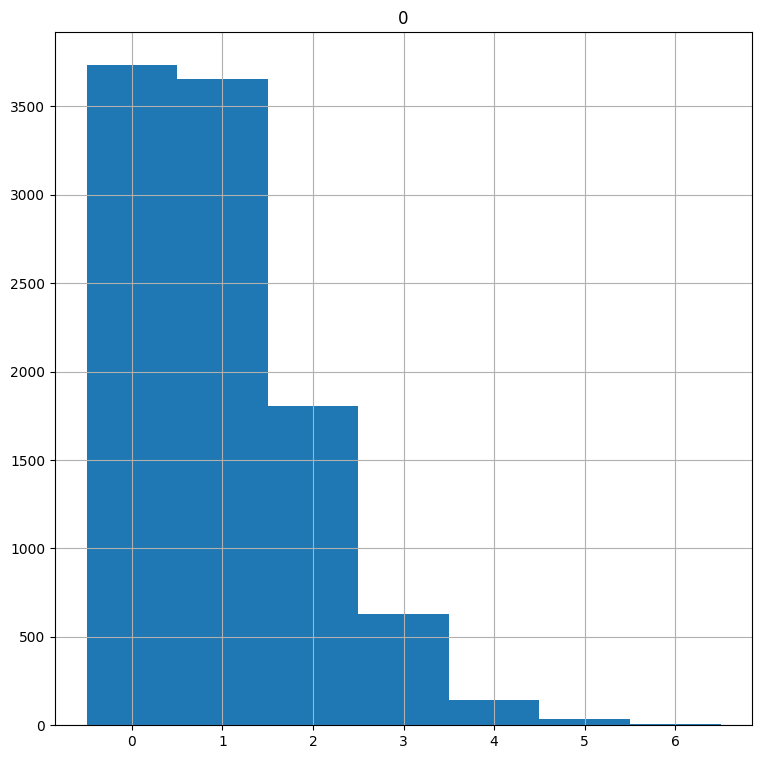

In [29]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

El histograma muestra que cuando las llegadas son relativamente poco frecuentes, es raro ver más de un par de llegadas en cada período de tiempo. Cuando la tasa de llegadas es alta, se vuelve cada vez más raro ver un número bajo de llegadas y la distribución comienza a verse más simétrica:

col_0   1   2   3    4    5    6    7     8     9     10  ...   15   16   17  \
row_0                                                     ...                  
counts   8  25  61  192  375  664  920  1129  1255  1261  ...  328  192  128   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  80  43  19  11   6   2   3  

[1 rows x 24 columns]


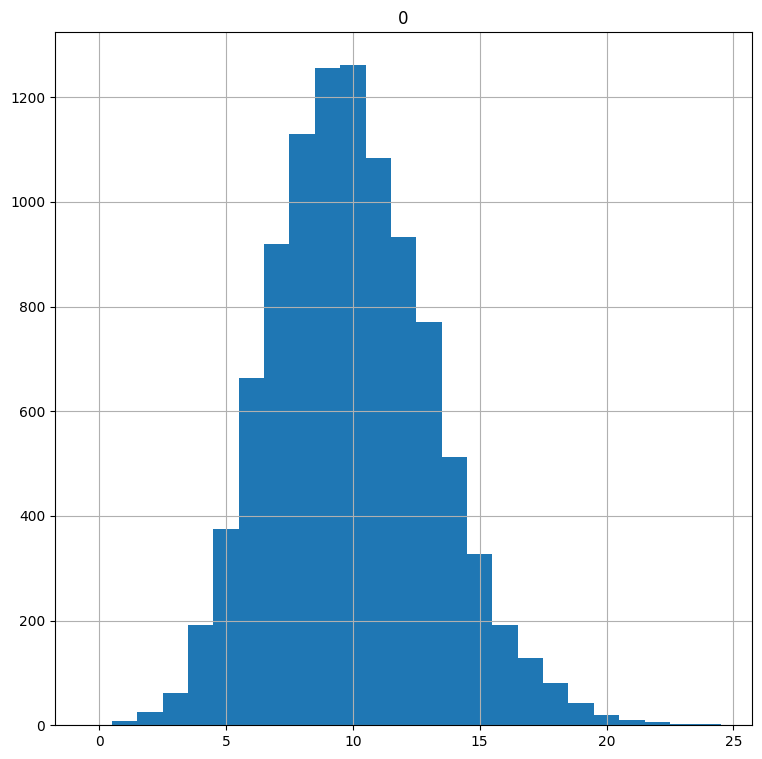

In [30]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

Al igual que con otras distribuciones de probabilidad discretas, podemos usar cdf() para verificar la probabilidad de lograr más o menos de un cierto número de éxitos y pmf() para verificar la probabilidad de obtener un número específico de éxitos:

In [ ]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

In [ ]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10